In [78]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import hinge_loss
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, precision_recall_curve
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate, cross_val_predict, GridSearchCV
from pprint import pprint
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [2]:
np.random.seed(42)

In [5]:
X,y = fetch_openml('mnist_784', version = 1, return_X_y = True)

In [6]:
X = X.to_numpy()
y = y.to_numpy()

In [30]:
target_names = np.unique(y)
print('Number of Samples: {0}, type: {1}'.format(X.shape[0],X.dtype))
print('Number of features: {0}'.format(X.shape[1]))
print('MinimumL{0}, Maximum:{1}'.format(np.min(X),np.max(X)))
print('Number of classes: {0}, type{1}'.format(len(target_names),y.dtype))
print("labels: {0}".format(target_names))

Number of Samples: 70000, type: float64
Number of features: 784
MinimumL0.0, Maximum:255.0
Number of classes: 10, typeobject
labels: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [31]:
X = MinMaxScaler().fit_transform(X)

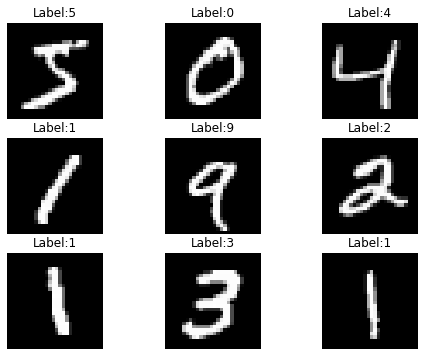

In [32]:
num_images = 9
factor = 3
fig,ax = plt.subplots(nrows = factor, ncols = factor, figsize = (8,6))
idx_offset = 0
for i in range(factor):
    index = idx_offset+ i *(factor)
    for j in range(factor):
        ax[i,j].imshow(X[index+j].reshape(28,28), cmap = 'gray')
        ax[i,j].set_title('Label:{0}'.format(str(y[index+j])))
        ax[i,j].set_axis_off()

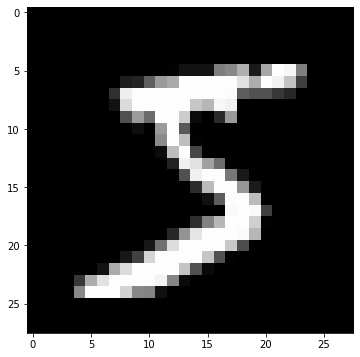

In [33]:
plt.figure(figsize=(6,6))
plt.imshow(X[0].reshape(28,28),cmap='gray')
plt.show()

In [34]:
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

<AxesSubplot:ylabel='Count'>

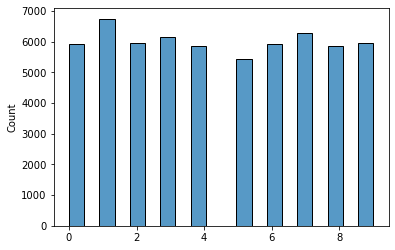

In [35]:
sns.histplot(data=np.int8(y_train),binwidth=0.45,bins=11)


# Binary Classification : 0-Detector

In [36]:
# intialize new variable names with all -1
y_train_0 = -1*np.ones((len(y_train)))
y_test_0 = -1*np.ones((len(y_test)))
# find indices of digit 0 image
indx_0 = np.where(y_train =='0') # remember original labels are of type str not int
# use those indices to modify y_train_0&y_test_0
y_train_0[indx_0] = 1
indx_0 = np.where(y_test == '0')
y_test_0[indx_0] = 1


### Sanity check

In [37]:
print(y_train) 
print(y_train_0)

['5' '0' '4' ... '5' '6' '8']
[-1.  1. -1. ... -1. -1. -1.]


In [38]:
print(np.where(y_train=='0')) # index of label 0's in original vector y
print(np.where(y_train_0 == 1)) # index of pos class in new vector

(array([    1,    21,    34, ..., 59952, 59972, 59987], dtype=int64),)
(array([    1,    21,    34, ..., 59952, 59972, 59987], dtype=int64),)


<ipython-input-39-bdca264d6053>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  factor = np.int(np.sqrt(num_images))


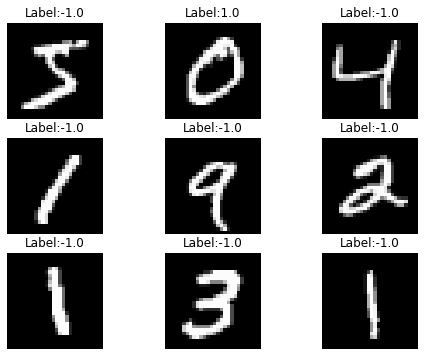

In [39]:
num_images = 9 # Choose a square number
factor = np.int(np.sqrt(num_images))
fig,ax = plt.subplots(nrows=factor,ncols=factor,figsize=(8,6))
idx_offset = 0 # take "num_images" starting from the index "idx_offset"
for i in range(factor):
    index = idx_offset+i*(factor)
    for j in range(factor):
        ax[i,j].imshow(X[index+j].reshape(28,28),cmap='gray')
        ax[i,j].set_title('Label:{0}'.format(str(y_train_0[index+j])))
        ax[i,j].set_axis_off()


### Basline Models

In [40]:
num_pos = len(np.where(y_train_0==1)[0])
num_neg = len(np.where(y_train_0==-1)[0])
print(num_pos,num_neg)


5923 54077


In [42]:
base_clf = DummyClassifier(strategy='most_frequent') # there are other strategies
base_clf.fit(X_train,y_train_0)
print('Training accuracy:{0:.2f}'.format(base_clf.score(X_train,y_train_0)))
print('Testing accuracy:{0:.2f}'.format(base_clf.score(X_test,y_test_0)))

Training accuracy:0.90
Testing accuracy:0.90


### Perceptron model


In [43]:
bin_clf = Perceptron(max_iter=100,random_state=1729)



In [46]:
bin_clf.fit(X_train,y_train_0)
print('Dimention of Weights w: {0}'.format(bin_clf.coef_.shape))
print('Bias :{0}'.format(bin_clf.intercept_))
print('The loss function: {0}'.format(bin_clf.loss_function_))

Dimention of Weights w: (1, 784)
Bias :[-108.]
The loss function: <sklearn.linear_model._sgd_fast.Hinge object at 0x000001B69D7B1AF0>


In [49]:
y_hat_train_0 = bin_clf.predict(X_train)
print('Training Accuracy: ',bin_clf.score(X_train,y_train_0))

Training Accuracy:  0.99095


In [51]:
print('Test accuracy: ',bin_clf.score(X_test,y_test_0))

Test accuracy:  0.989


### Displaying predictions


<ipython-input-55-5c7120be0a53>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  factor = np.int(np.sqrt(num_images))


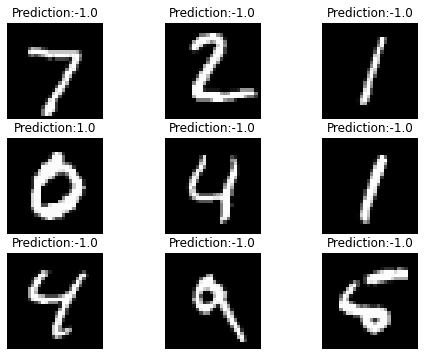

In [55]:
y_hat_test_0 = bin_clf.predict(X_test)
num_images = 9 # Choose a square number
factor = np.int(np.sqrt(num_images))
fig,ax = plt.subplots(nrows=factor,ncols=factor,figsize=(8,6))
idx_offset = 0 # display "num_images" starting from idx_offset
for i in range(factor):
    index = idx_offset+i*(factor)
    for j in range(factor):
        ax[i,j].imshow(X_test[index+j].reshape(28,28),cmap='gray') # we should not use x_train
        ax[i,j].set_title('Prediction:{0}'.format(str(y_hat_test_0[index+j])))
        ax[i,j].set_axis_off()

## Multiclass Classifier

In [63]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import LabelBinarizer
clf = Perceptron(random_state=1729)
# let's use label binarizer just to see the encoding
y_train_ovr = LabelBinarizer().fit_transform(y_train) # setting sparse_output=True in Labe
for i in range(10):
    print('{0}:{1}'.format(y_train[i],y_train_ovr[i]))

5:[0 0 0 0 0 1 0 0 0 0]
0:[1 0 0 0 0 0 0 0 0 0]
4:[0 0 0 0 1 0 0 0 0 0]
1:[0 1 0 0 0 0 0 0 0 0]
9:[0 0 0 0 0 0 0 0 0 1]
2:[0 0 1 0 0 0 0 0 0 0]
1:[0 1 0 0 0 0 0 0 0 0]
3:[0 0 0 1 0 0 0 0 0 0]
1:[0 1 0 0 0 0 0 0 0 0]
4:[0 0 0 0 1 0 0 0 0 0]


In [65]:
clf.fit(X_train,y_train)

Perceptron(random_state=1729)

In [67]:
scores = clf.decision_function(X_train[6].reshape(1,-1))
print(scores)
print('The predicted class: ',np.argmax(scores))

[[-631.88492118  154.366213    -65.23234141  -90.95338716 -189.29568627
  -137.14385236  -99.64604383 -159.09859285 -136.86391388 -199.26120723]]
The predicted class:  1


In [69]:
print('Preicted output:\n')
print(clf.predict(X_train[0].reshape(1,-1)))

Preicted output:

['5']


In [82]:
y_hat = clf.predict(X_train)
print(classification_report(y_train,y_hat))


              precision    recall  f1-score   support

           0       0.98      0.95      0.97      5923
           1       0.94      0.98      0.96      6742
           2       0.89      0.90      0.90      5958
           3       0.86      0.87      0.87      6131
           4       0.89      0.94      0.91      5842
           5       0.81      0.88      0.85      5421
           6       0.92      0.97      0.94      5918
           7       0.91      0.94      0.92      6265
           8       0.92      0.77      0.84      5851
           9       0.92      0.82      0.87      5949

    accuracy                           0.90     60000
   macro avg       0.90      0.90      0.90     60000
weighted avg       0.91      0.90      0.90     60000



In [85]:
clf.score(X_train,y_train)

0.9041333333333333